In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("CC GENERAL.csv", sep="," , decimal=".")
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.fillna(value=0, inplace=True) # Lleno los lugares vacíos con cero
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [19]:
X = df.select_dtypes(include='number')


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


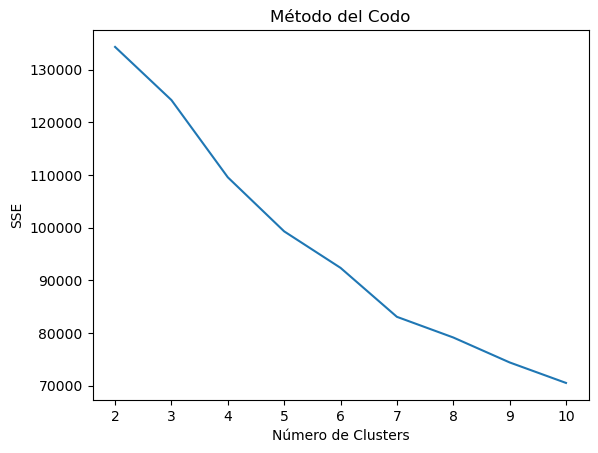

In [23]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse)
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.show()


In [25]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [29]:
numeric_cols = df.select_dtypes(include='number').columns

# Agrupar por cluster y calcular la media solo en columnas numéricas
cluster_profiles = df.groupby('Cluster')[numeric_cols].mean().round(2)

# Mostrar los perfiles
print(cluster_profiles)



         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                            
0        3504.47               0.98    6465.42           4259.55   
1        2459.90               0.97     277.17            209.00   
2         134.13               0.40     312.63            202.36   
3         830.98               0.95    1139.49            540.05   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                       2206.91       1357.13                 0.95   
1                         68.41       1877.65                 0.17   
2                        110.49        329.73                 0.25   
3                        599.71        192.79                 0.86   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                       

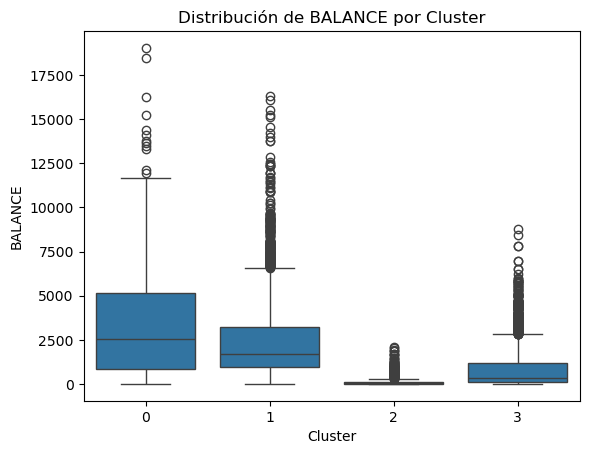

In [31]:
sns.boxplot(x='Cluster', y='BALANCE', data=df)
plt.title('Distribución de BALANCE por Cluster')
plt.show()


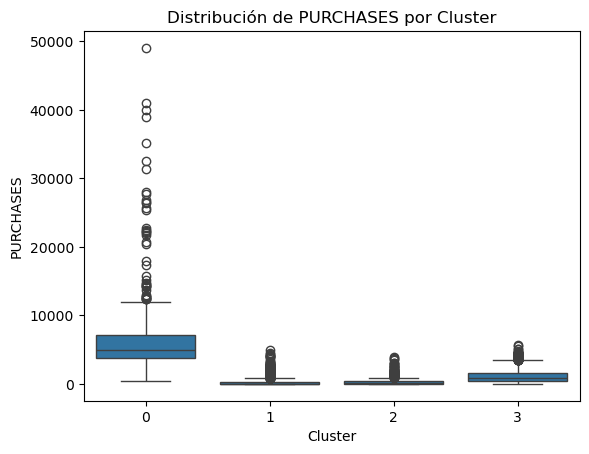

In [33]:

sns.boxplot(x='Cluster', y='PURCHASES', data=df)
plt.title('Distribución de PURCHASES por Cluster')
plt.show()


In [35]:
perfil_cluster = {
    0: "Clientes Premium",
    1: "Clientes Nuevos o Cautelosos",
    2: "Clientes de Alto Potencial",
    3: "Clientes Sensibles al Crédito"
}
df['Perfil'] = df['Cluster'].map(perfil_cluster)


In [37]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,Perfil
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2,Clientes de Alto Potencial
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,Clientes Nuevos o Cautelosos
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3,Clientes Sensibles al Crédito
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,2,Clientes de Alto Potencial
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,Clientes Nuevos o Cautelosos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3,Clientes Sensibles al Crédito
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6,3,Clientes Sensibles al Crédito
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3,Clientes Sensibles al Crédito
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1,Clientes Nuevos o Cautelosos


C:\Users\Rizie\AppData\Local\Temp\ipykernel_13844\3090503243.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Perfil', y='CREDIT_LIMIT', data=df, palette='Set3')


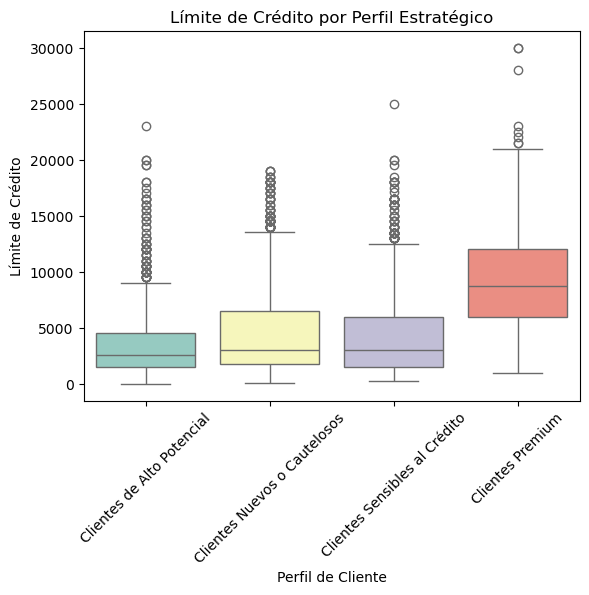

In [41]:
sns.boxplot(x='Perfil', y='CREDIT_LIMIT', data=df, palette='Set3')
plt.title('Límite de Crédito por Perfil Estratégico')
plt.xlabel('Perfil de Cliente')
plt.ylabel('Límite de Crédito')
plt.xticks(rotation=45)
plt.show()


In [45]:
premium = df[df['Perfil'] == 'Clientes Premium']
sensibles = df[df['Perfil'] == 'Clientes Sensibles al Crédito']

# Seleccionar variables clave
variables = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE']

# Calcular promedios
comparacion = pd.DataFrame({
    'Clientes Premium': premium[variables].mean().round(2),
    'Sensibles al Crédito': sensibles[variables].mean().round(2)
})

print(comparacion)


              Clientes Premium  Sensibles al Crédito
BALANCE                3504.47                830.98
PURCHASES              6465.42               1139.49
CREDIT_LIMIT           9513.89               4014.04
PAYMENTS               6862.92               1240.80
TENURE                   11.93                 11.54


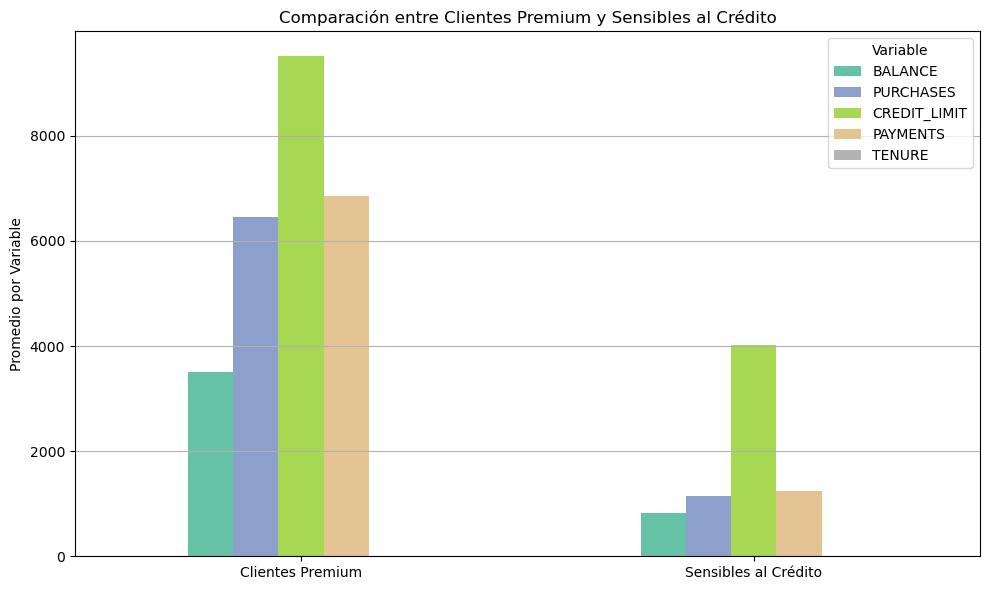

In [47]:
comparacion_plot = comparacion.T

# Gráfico de barras
comparacion_plot.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Comparación entre Clientes Premium y Sensibles al Crédito')
plt.ylabel('Promedio por Variable')
plt.xticks(rotation=0)
plt.legend(title='Variable')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
